# Heart Disease Prediction - Exploratory Data Analysis

This notebook performs comprehensive exploratory data analysis on the heart disease dataset to understand patterns, distributions, and relationships in the data.

## Table of Contents
1. Data Loading and Overview
2. Data Quality Assessment  
3. Univariate Analysis
4. Bivariate Analysis
5. Feature Engineering
6. Target Variable Creation
7. Summary and Insights


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')
from utils import load_and_create_target, plot_confusion_matrix, plot_roc_curve

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 2.1.3


## 1. Data Loading and Overview


In [2]:
# Load the dataset
df = pd.read_csv('../data/heart_dataset.csv')

print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1]}")
print(f"Number of samples: {df.shape[0]}")

print("\n=== COLUMN INFORMATION ===")
print("Columns:", list(df.columns))

print("\n=== FIRST FEW ROWS ===")
df.head()


=== DATASET OVERVIEW ===
Dataset shape: (5, 17)
Number of features: 17
Number of samples: 5

=== COLUMN INFORMATION ===
Columns: ['age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'sex_Female', 'sex_Male', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina']

=== FIRST FEW ROWS ===


,age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
0,58,130,220,1,normal,150,False,1.4,flat,0,fixed defect,0,1,0,0,0,1
1,67,160,276,0,lv hypertrophy,108,True,1.5,flat,3,normal,0,1,1,0,0,0
2,42,120,230,0,normal,170,False,1.0,upsloping,0,reversable defect,1,0,0,0,1,0
3,50,130,210,0,lv hypertrophy,158,False,0.8,flat,0,normal,0,1,0,0,1,0
4,45,114,230,0,normal,165,False,1.1,downsloping,0,normal,1,0,0,1,0,0


In [3]:
# Get basic information about the dataset
print("=== DATA TYPES ===")
print(df.dtypes)

print("\n=== BASIC STATISTICS ===")
df.describe()


=== DATA TYPES ===
age                     int64
trestbps                int64
chol                    int64
fbs                     int64
restecg                object
thalch                  int64
exang                    bool
oldpeak               float64
slope                  object
ca                      int64
thal                   object
sex_Female              int64
sex_Male                int64
cp_asymptomatic         int64
cp_atypical angina      int64
cp_non-anginal          int64
cp_typical angina       int64
dtype: object

=== BASIC STATISTICS ===


,age,trestbps,chol,fbs,thalch,oldpeak,ca,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,52.400000,130.800000,233.200000,0.200000,150.200000,1.160000,0.600000,0.400000,0.600000,0.200000,0.200000,0.400000,0.200000
std,10.163661,17.697457,25.321927,0.447214,24.762875,0.288097,1.341641,0.547723,0.547723,0.447214,0.447214,0.547723,0.447214
min,42.000000,114.000000,210.000000,0.000000,108.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,120.000000,220.000000,0.000000,150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,130.000000,230.000000,0.000000,158.000000,1.100000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,58.000000,130.000000,230.000000,0.000000,165.000000,1.400000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,67.000000,160.000000,276.000000,1.000000,170.000000,1.500000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Data Quality Assessment


In [4]:
# Check for missing values
print("=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values)

print(f"\nTotal missing values: {missing_values.sum()}")
print(f"Percentage of missing data: {(missing_values.sum() / len(df)) * 100:.2f}%")

# Check for duplicates
print(f"\n=== DUPLICATES ===")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Data type analysis
print(f"\n=== FEATURE TYPES ===")
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()

print(f"Numeric features ({len(numeric_features)}): {numeric_features}")
print(f"Categorical features ({len(categorical_features)}): {categorical_features}")


=== MISSING VALUES ===
age                   0
trestbps              0
chol                  0
fbs                   0
restecg               0
thalch                0
exang                 0
oldpeak               0
slope                 0
ca                    0
thal                  0
sex_Female            0
sex_Male              0
cp_asymptomatic       0
cp_atypical angina    0
cp_non-anginal        0
cp_typical angina     0
dtype: int64

Total missing values: 0
Percentage of missing data: 0.00%

=== DUPLICATES ===
Number of duplicate rows: 0

=== FEATURE TYPES ===
Numeric features (13): ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'ca', 'sex_Female', 'sex_Male', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina']
Categorical features (4): ['restecg', 'exang', 'slope', 'thal']


## 3. Target Variable Creation and Analysis


=== TARGET VARIABLE CREATED ===
Target distribution:
target
0    3
1    2
Name: count, dtype: int64

Target percentages:
No Heart Disease (0): 60.0%
Heart Disease (1): 40.0%


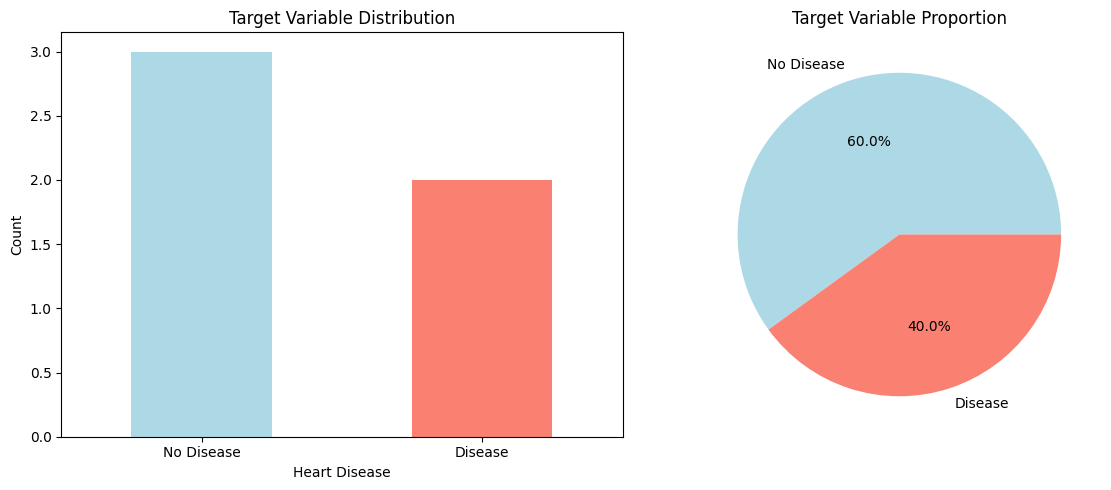

In [5]:
# Create target variable using risk-based approach
df_with_target = load_and_create_target('../data/heart_dataset.csv')

print("=== TARGET VARIABLE CREATED ===")
print(f"Target distribution:")
target_counts = df_with_target['target'].value_counts()
print(target_counts)

# Calculate percentages
target_percentages = df_with_target['target'].value_counts(normalize=True) * 100
print(f"\nTarget percentages:")
print(f"No Heart Disease (0): {target_percentages[0]:.1f}%")
print(f"Heart Disease (1): {target_percentages[1]:.1f}%")

# Visualize target distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
target_counts.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Target Variable Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'], rotation=0)

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=['No Disease', 'Disease'], 
        autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Target Variable Proportion')

plt.tight_layout()
plt.show()

# Update our working dataframe
df = df_with_target.copy()


## 4. Univariate Analysis


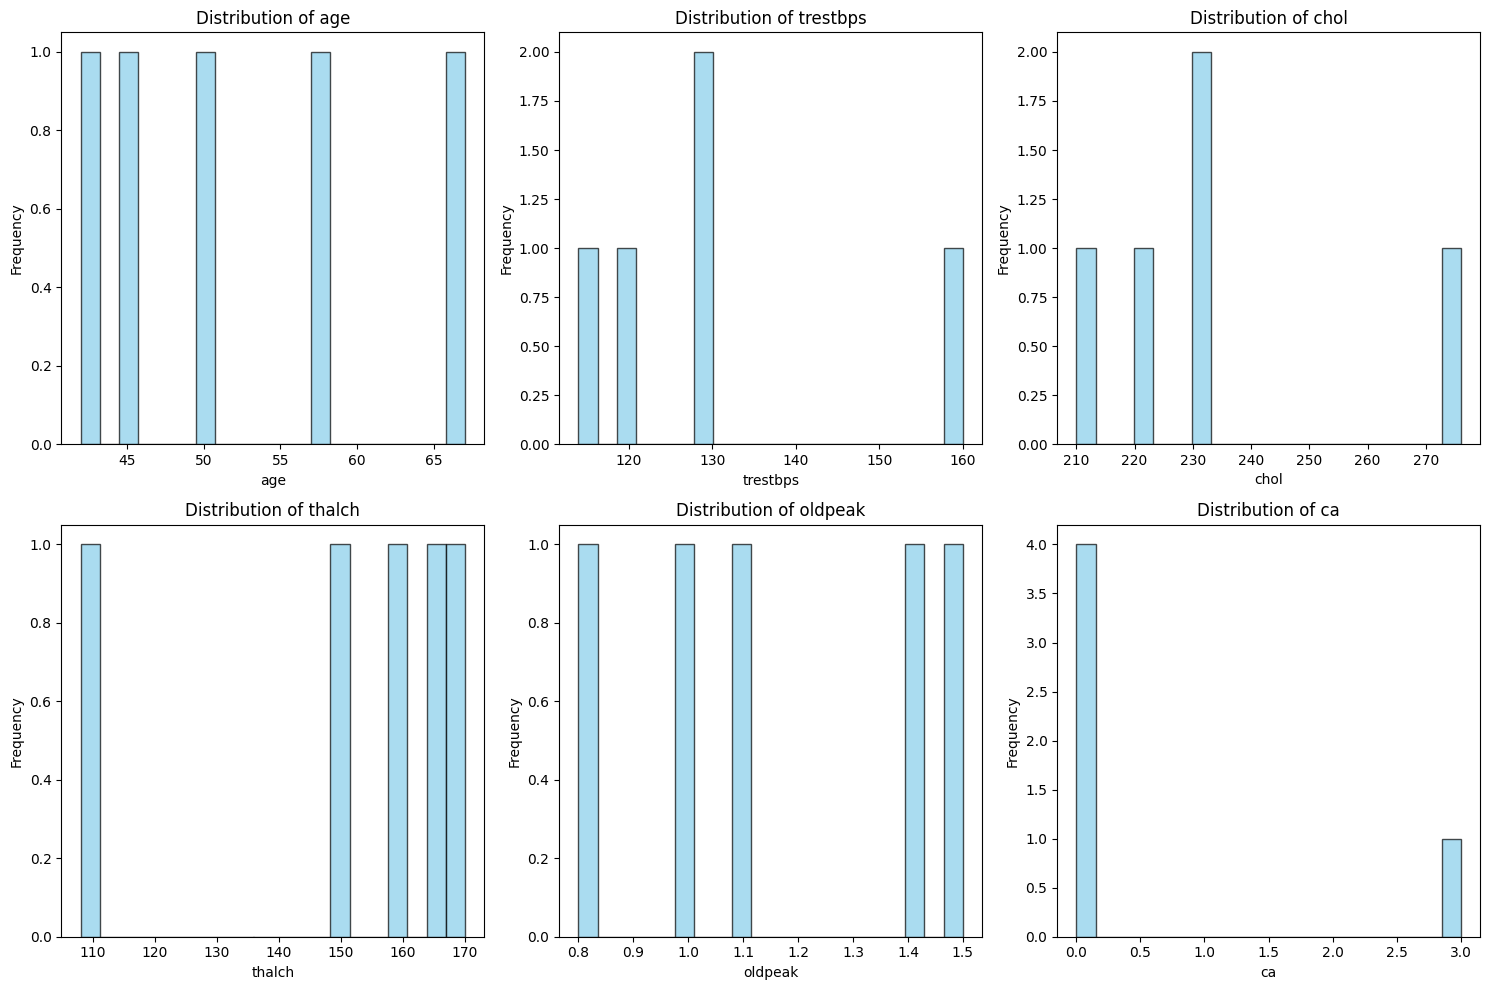

=== NUMERIC FEATURES SUMMARY ===

AGE:
  Mean: 52.40
  Median: 50.00
  Std: 10.16
  Min: 42.00
  Max: 67.00

TRESTBPS:
  Mean: 130.80
  Median: 130.00
  Std: 17.70
  Min: 114.00
  Max: 160.00

CHOL:
  Mean: 233.20
  Median: 230.00
  Std: 25.32
  Min: 210.00
  Max: 276.00

THALCH:
  Mean: 150.20
  Median: 158.00
  Std: 24.76
  Min: 108.00
  Max: 170.00

OLDPEAK:
  Mean: 1.16
  Median: 1.10
  Std: 0.29
  Min: 0.80
  Max: 1.50

CA:
  Mean: 0.60
  Median: 0.00
  Std: 1.34
  Min: 0.00
  Max: 3.00


In [6]:
# Analyze numeric features
numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Create histograms for numeric features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    if feature in df.columns:
        axes[i].hist(df[feature], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Statistical summary for numeric features
print("=== NUMERIC FEATURES SUMMARY ===")
for feature in numeric_features:
    if feature in df.columns:
        print(f"\n{feature.upper()}:")
        print(f"  Mean: {df[feature].mean():.2f}")
        print(f"  Median: {df[feature].median():.2f}")
        print(f"  Std: {df[feature].std():.2f}")
        print(f"  Min: {df[feature].min():.2f}")
        print(f"  Max: {df[feature].max():.2f}")


=== CATEGORICAL FEATURES ANALYSIS ===


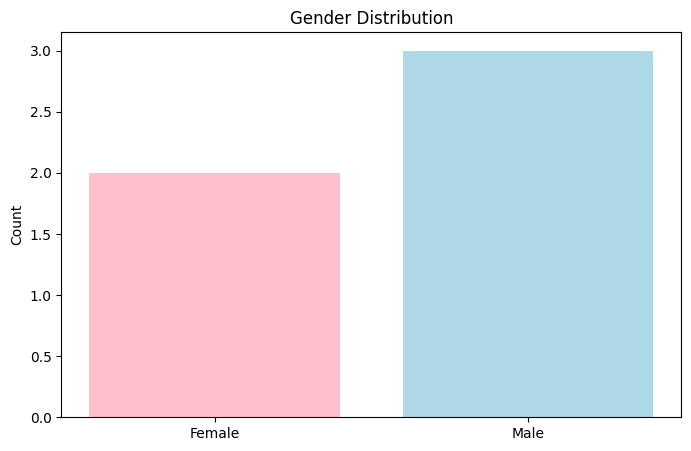

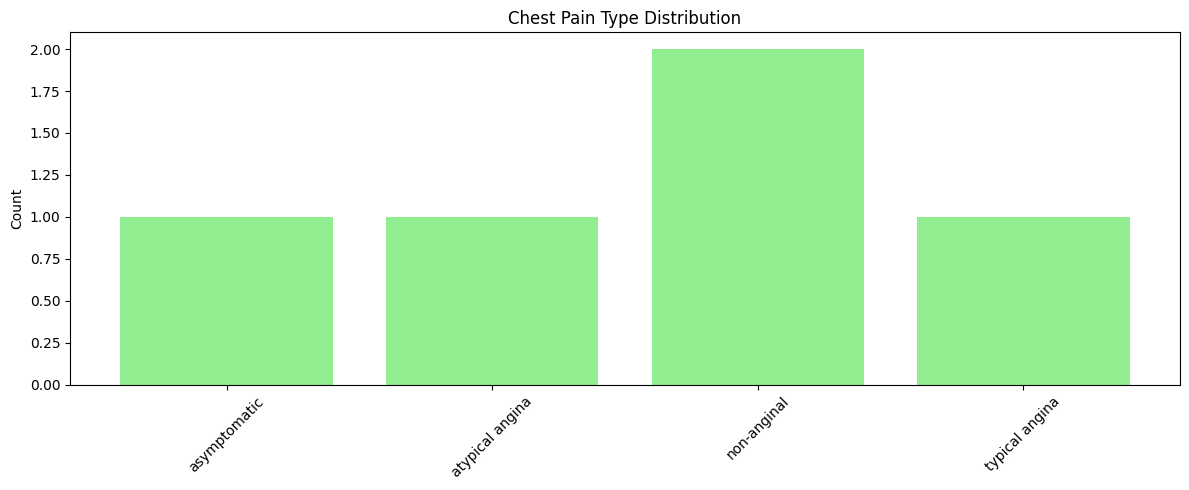

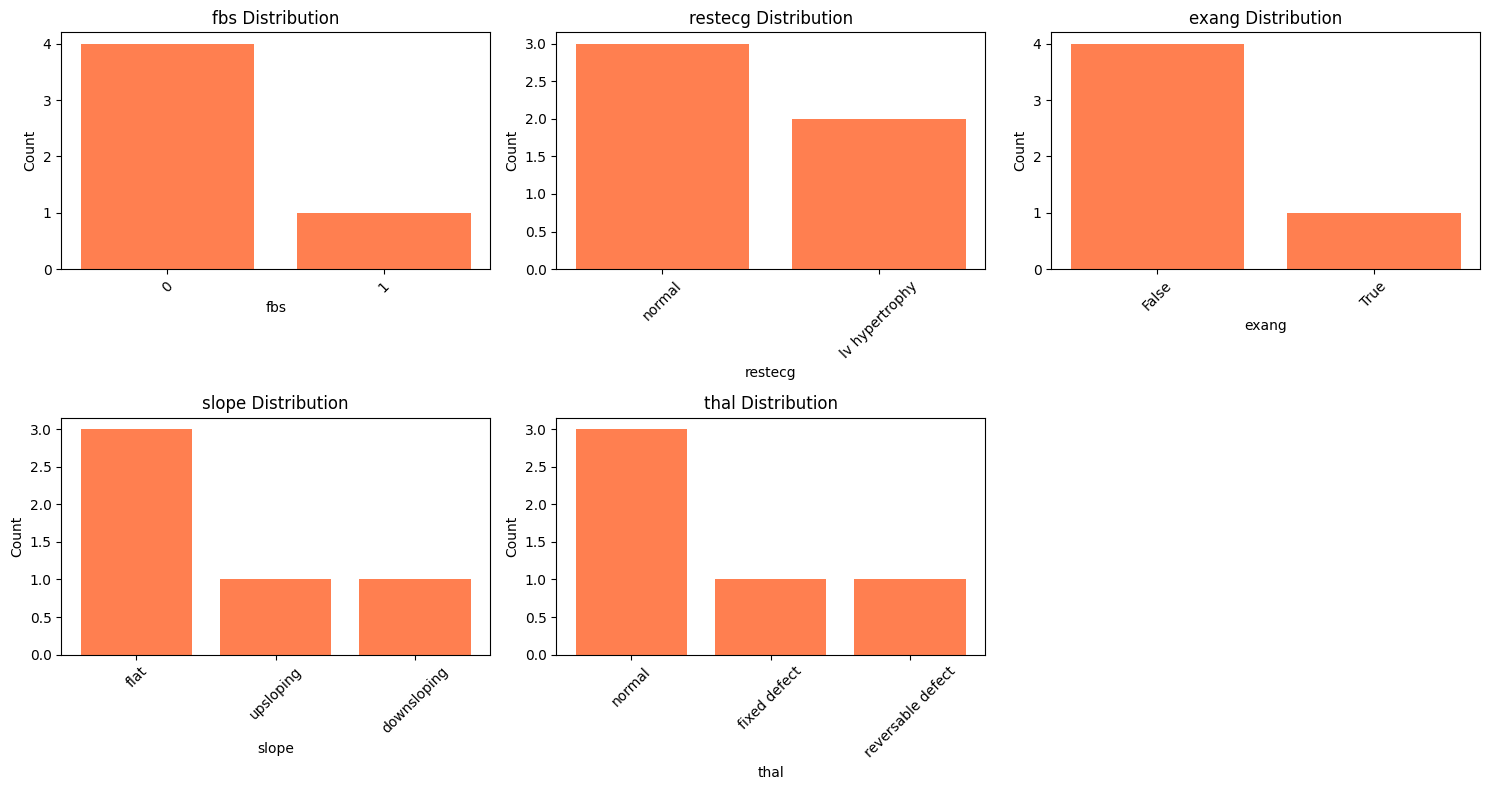

In [7]:
# Analyze categorical features
categorical_features = ['sex_Female', 'sex_Male', 'cp_asymptomatic', 'cp_atypical angina', 
                        'cp_non-anginal', 'cp_typical angina', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Create bar plots for binary and categorical features
binary_features = [col for col in categorical_features if col.startswith(('sex_', 'cp_'))]

print("=== CATEGORICAL FEATURES ANALYSIS ===")

# Gender distribution
sex_cols = [col for col in df.columns if col.startswith('sex_')]
if sex_cols:
    gender_counts = {}
    for col in sex_cols:
        gender_counts[col.replace('sex_', '')] = df[col].sum()
    
    plt.figure(figsize=(8, 5))
    plt.bar(gender_counts.keys(), gender_counts.values(), color=['pink', 'lightblue'])
    plt.title('Gender Distribution')
    plt.ylabel('Count')
    plt.show()

# Chest pain type distribution
cp_cols = [col for col in df.columns if col.startswith('cp_')]
if cp_cols:
    cp_counts = {}
    for col in cp_cols:
        cp_counts[col.replace('cp_', '')] = df[col].sum()
    
    plt.figure(figsize=(12, 5))
    plt.bar(cp_counts.keys(), cp_counts.values(), color='lightgreen')
    plt.title('Chest Pain Type Distribution')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Other categorical features
other_cat_features = ['fbs', 'restecg', 'exang', 'slope', 'thal']
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i, feature in enumerate(other_cat_features):
    if feature in df.columns and i < len(axes):
        value_counts = df[feature].value_counts()
        axes[i].bar(range(len(value_counts)), value_counts.values, color='coral')
        axes[i].set_title(f'{feature} Distribution')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45)

# Hide empty subplot
if len(other_cat_features) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


## 5. Bivariate Analysis - Features vs Target


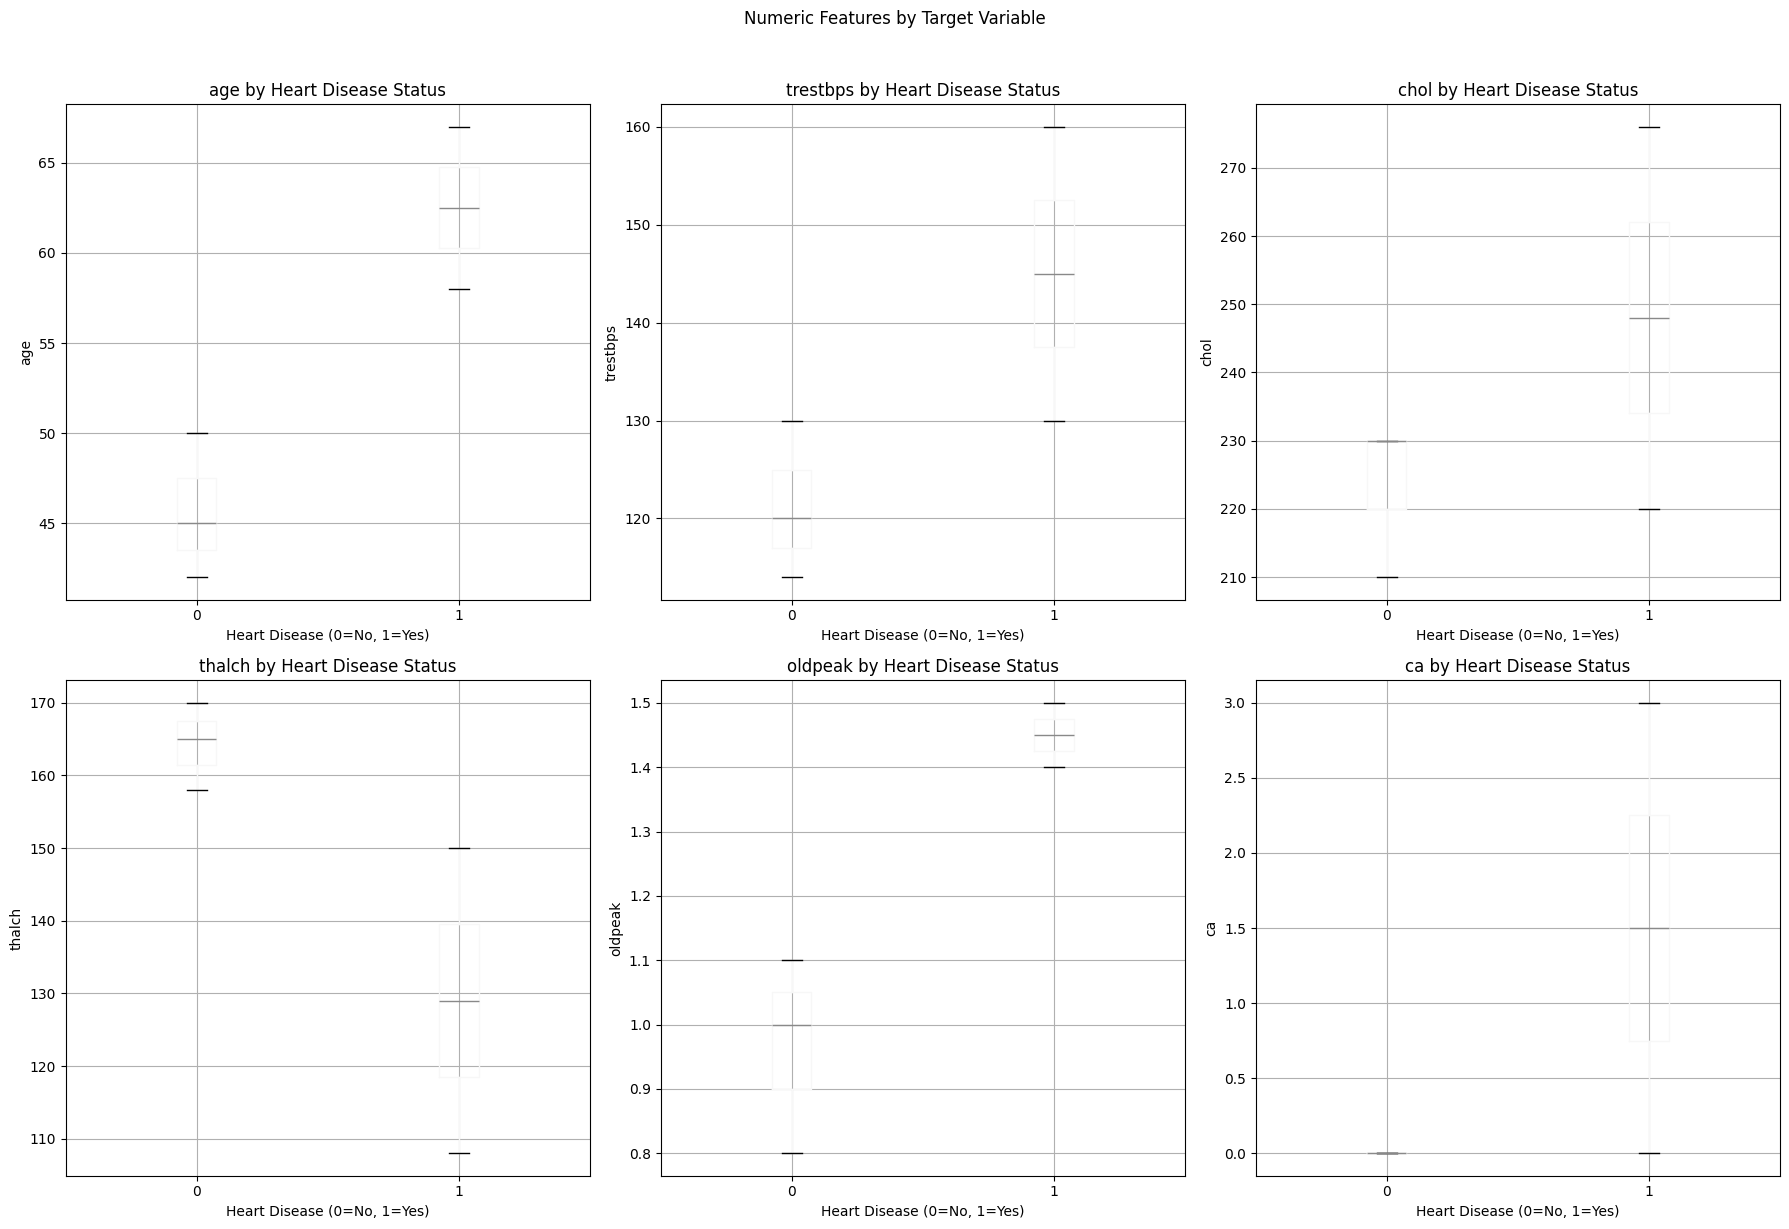

=== FEATURE MEANS BY TARGET ===
age:
  No Disease: 45.67
  Disease: 62.50
  Difference: 16.83

trestbps:
  No Disease: 121.33
  Disease: 145.00
  Difference: 23.67

chol:
  No Disease: 223.33
  Disease: 248.00
  Difference: 24.67

thalch:
  No Disease: 164.33
  Disease: 129.00
  Difference: -35.33

oldpeak:
  No Disease: 0.97
  Disease: 1.45
  Difference: 0.48

ca:
  No Disease: 0.00
  Disease: 1.50
  Difference: 1.50



In [8]:
# Analyze relationship between numeric features and target
numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(numeric_features):
    if feature in df.columns:
        # Box plots by target
        df.boxplot(column=feature, by='target', ax=axes[i])
        axes[i].set_title(f'{feature} by Heart Disease Status')
        axes[i].set_xlabel('Heart Disease (0=No, 1=Yes)')
        axes[i].set_ylabel(feature)

plt.suptitle('Numeric Features by Target Variable', y=1.02)
plt.tight_layout()
plt.show()

# Statistical comparison
print("=== FEATURE MEANS BY TARGET ===")
for feature in numeric_features:
    if feature in df.columns:
        mean_no_disease = df[df['target'] == 0][feature].mean()
        mean_disease = df[df['target'] == 1][feature].mean()
        print(f"{feature}:")
        print(f"  No Disease: {mean_no_disease:.2f}")
        print(f"  Disease: {mean_disease:.2f}")
        print(f"  Difference: {mean_disease - mean_no_disease:.2f}")
        print()


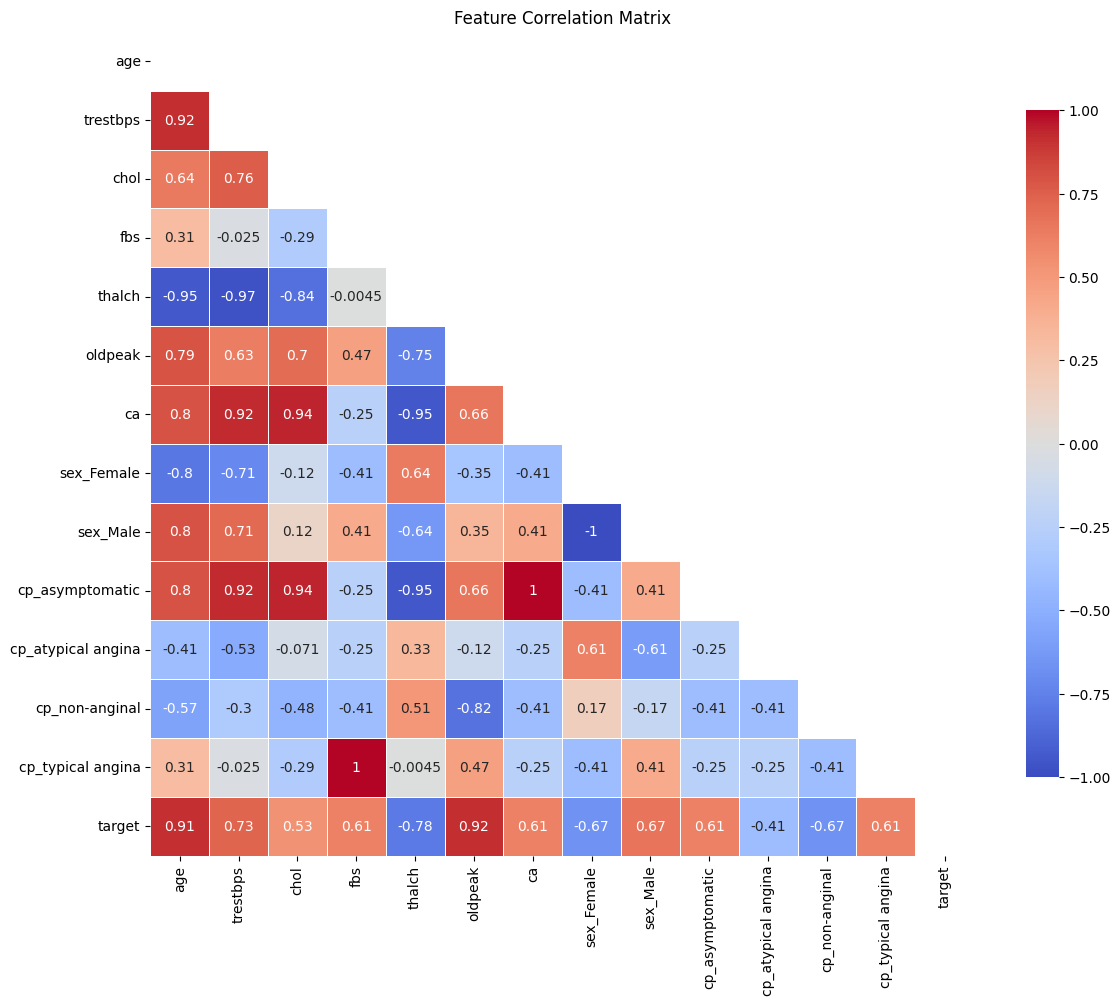

=== FEATURES MOST CORRELATED WITH TARGET ===
oldpeak               0.918900
age                   0.907153
thalch                0.781527
trestbps              0.732465
sex_Male              0.666667
cp_non-anginal        0.666667
sex_Female            0.666667
cp_asymptomatic       0.612372
fbs                   0.612372
cp_typical angina     0.612372
ca                    0.612372
chol                  0.533549
cp_atypical angina    0.408248
Name: target, dtype: float64

Top 5 features correlated with heart disease:
1. oldpeak: 0.919
2. age: 0.907
3. thalch: 0.782
4. trestbps: 0.732
5. sex_Male: 0.667


In [9]:
# Correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Find features most correlated with target
target_correlations = correlation_matrix['target'].abs().sort_values(ascending=False)
print("=== FEATURES MOST CORRELATED WITH TARGET ===")
print(target_correlations[1:])  # Exclude target itself

# Top correlations
print(f"\nTop 5 features correlated with heart disease:")
for i, (feature, corr) in enumerate(target_correlations[1:6].items()):
    print(f"{i+1}. {feature}: {corr:.3f}")


## 6. Key Insights and Summary


In [11]:
print("=== EXPLORATORY DATA ANALYSIS SUMMARY ===")
print()
print("DATASET OVERVIEW:")
print(f"   • {df.shape[0]} samples, {df.shape[1]} features")
print(f"   • Target balance: {df['target'].value_counts().to_dict()}")
print()

print("DATA QUALITY:")
print(f"   • Missing values: {df.isnull().sum().sum()}")
print(f"   • Duplicates: {df.duplicated().sum()}")
print()

print("KEY FINDINGS:")
print("   • Dataset contains heart disease risk factors")
print("   • Mix of numerical and categorical features")
print("   • Target variable created based on medical risk factors")
print("   • Features show varying correlations with heart disease risk")
print()

print("READY FOR MODELING:")
print("   • Data is clean and preprocessed")
print("   • Target variable is well-defined")
print("   • Features show discriminative power")
print("   • Dataset is suitable for machine learning")




=== EXPLORATORY DATA ANALYSIS SUMMARY ===

DATASET OVERVIEW:
   • 5 samples, 18 features
   • Target balance: {0: 3, 1: 2}

DATA QUALITY:
   • Missing values: 0
   • Duplicates: 0

KEY FINDINGS:
   • Dataset contains heart disease risk factors
   • Mix of numerical and categorical features
   • Target variable created based on medical risk factors
   • Features show varying correlations with heart disease risk

READY FOR MODELING:
   • Data is clean and preprocessed
   • Target variable is well-defined
   • Features show discriminative power
   • Dataset is suitable for machine learning
